# Check MRI Quality

Things that need to be adjusted for SEA Lab:
* File paths (of course)
* Modify to account for multiple runs of a sequence (need to know what that looks like scanner side)


In [4]:
# Participant-specific information
subject_id = '1011' #update

mri_location = '/Volumes/SEALab_Projects/BABIES/MRI/Newborn_BIDS/raw/'

raw_data_locations = {'rest0': mri_location + subject_id + '/NIFTI/*rsEPI-Fsa_*', 
                      'rest1': mri_location + subject_id + '/NIFTI/*rsEPI-Fsp_*',
                      'dwi0': mri_location + subject_id + '/NIFTI/*DTI_b700_2000_96dir*',
                      'dwi1': mri_location + subject_id + '/NIFTI/*DWI_FSA_MB3*',
                      'qt1': mri_location + subject_id + '/NIFTI/*MFA_T1*', 
                      'b1map': mri_location + subject_id + '/NIFTI/*B1MAP*', 
                      't1w': mri_location + subject_id + '/NIFTI/*3D_T1_CS2*',
                      't2w': mri_location + subject_id + '/NIFTI/*3D_T2*', 
                      't2wSlice': mri_location + subject_id + '/NIFTI/*BlackfordT2W*', 
                      'pcasl': mri_location + subject_id + '/XMLPARREC/*pCASL_2DMS_6mmSl*'}
                        #'pcasl_pw': mri_location + subject_id + '/XMLPARREC/*pCASL_PLD1900_LD1000_REL5FIXED*', 
                        #'pcasl_m0': mri_location + subject_id + '/XMLPARREC/*pCASL_2DMS_M0*'              

### Reorganize and rename data to conform to BIDS

In [6]:
# Import libraries and set up static study variables
import os
import shutil
from glob import glob
from subprocess import check_call
subject_id = '1017' #update
sequence_list = list(raw_data_locations.keys())

# make level 1 folders
os.mkdir(mri_location + subject_id + '/anat')
os.mkdir(mri_location + subject_id + '/func')
os.mkdir(mri_location + subject_id + '/dwi')
os.mkdir(mri_location + subject_id + '/qc')

for sequence in sequence_list:
    if 'dwi' in sequence:
        dwis0 = sorted(glob(raw_data_locations['dwi0']))
        dwis1 = sorted(glob(raw_data_locations['dwi1']))
        if len(dwis0)>0:
            seq=1
            for file in dwis0:
                filepath, filebasename = os.path.split(file)
                if '.nii' in filebasename:
                    fileext = '.nii'
                elif '.json' in filebasename:
                    fileext = '.json'
                elif '.bval' in filebasename:
                    fileext = '.bval'
                elif '.bvec' in filebasename:
                    fileext = '.bvec'
                os.rename(file, mri_location + subject_id + '/dwi/'+subject_id+'_dwi_pe0_b2000_b700_'+str(seq)+fileext)
                seq=seq+1
            seq=1
            for file in dwis1:
                filepath, filebasename = os.path.split(file)
                if '.nii' in filebasename:
                    fileext = '.nii'
                elif '.json' in filebasename:
                    fileext = '.json'
                elif '.bval' in filebasename:
                    fileext = '.bval'
                elif '.bvec' in filebasename:
                    fileext = '.bvec'
                os.rename(file, mri_location + subject_id + '/dwi/'+subject_id+'_dwi_pe1_'+str(seq)+fileext) 
                seq=seq+1
    elif 'rest' in sequence:
        rest0s = sorted(glob(raw_data_locations['rest0']))
        seq=1
        for file in rest0s:
            filepath, filebasename = os.path.split(file)
            if '.nii' in filebasename:
                fileext = '.nii'
            elif '.json' in filebasename:
                fileext = '.json'
            os.rename(file, mri_location + subject_id + '/func/'+subject_id+'_rsEPI_Fsa_'+str(seq)+fileext)
            seq=seq+1
        rest1s = sorted(glob(raw_data_locations['rest1']))
        seq=1
        for file in rest1s:
            filepath, filebasename = os.path.split(file)
            if '.nii' in filebasename:
                fileext = '.nii'
            elif '.json' in filebasename:
                fileext = '.json'
            os.rename(file, mri_location + subject_id + '/func/'+subject_id+'_rsEPI_Fsp_'+str(seq)+fileext)   
            seq=seq+1
    elif 'pcasl' in sequence:
        pcasls = sorted(glob(raw_data_locations['pcasl']))
        pws=[]
        m0s=[]
        for file in pcasls:
            if 'SOURCE' in file:
                m0s.append(file)
            else: 
                pws.append(file)               
        if len(pws)>0:
            seq=1
            for file in pws:     
                filepath, filebasename = os.path.split(file)
                if '.PAR' in filebasename:
                    fileext = '.PAR'
                elif '.REC' in filebasename:
                    fileext = '.REC'
                os.rename(file, mri_location + subject_id + '/func/'+subject_id+'_pcasl_pw_'+str(seq)+fileext)
                seq=seq+1
            seq=1
            for file in m0s:
                filepath, filebasename = os.path.split(file)
                if '.PAR' in filebasename:
                    fileext = '.PAR'
                elif '.REC' in filebasename:
                    fileext = '.REC'
                os.rename(file, mri_location + subject_id + '/func/'+subject_id+'_pcasl_m0_'+str(seq)+fileext)
                seq=seq+1
    elif sequence=='t1w':
        t1ws = sorted(glob(raw_data_locations['t1w']))
        if len(t1ws)>0:
            seq=1
            for file in t1ws:
                filepath, filebasename = os.path.split(file)
                if '.nii' in filebasename:
                    fileext = '.nii'
                elif '.json' in filebasename:
                    fileext = '.json'
                os.rename(file, mri_location + subject_id + '/anat/'+subject_id+'_T1w_'+str(seq)+fileext)
                seq=seq+1
    elif sequence=='t2w':
        t2ws = sorted(glob(raw_data_locations['t2w']))
        if len(t2ws)>0:
            seq=1
            for file in t2ws:
                filepath, filebasename = os.path.split(file)
                if '.nii' in filebasename:
                    fileext = '.nii'
                elif '.json' in filebasename:
                    fileext = '.json'
                os.rename(file, mri_location + subject_id + '/anat/'+subject_id+'_T2w_'+str(seq)+fileext)
                seq=seq+1
    elif sequence=='t2wSlice':
        t2wSlices = sorted(glob(raw_data_locations['t2wSlice']))
        if len(t2wSlices)>0:
            seq=1
            for file in t2wSlices:
                filepath, filebasename = os.path.split(file)
                if '.nii' in filebasename:
                    fileext = '.nii'
                elif '.json' in filebasename:
                    fileext = '.json'
                os.rename(file, mri_location + subject_id + '/anat/'+subject_id+'_T2w_slice_'+str(seq)+fileext)
                seq=seq+1
    elif sequence=='qt1':
        qt1s = sorted(glob(raw_data_locations['qt1']))
        if len(qt1s)>0:
            seq=1
            for file in qt1s:
                filepath, filebasename = os.path.split(file)
                if '.nii' in filebasename:
                    fileext = '.nii'
                elif '.json' in filebasename:
                    fileext = '.json'
                os.rename(file, mri_location + subject_id + '/anat/'+subject_id+'_quantitative_T1_'+str(seq)+fileext)
                seq=seq+1
    elif sequence=='b1map':
        b1maps = sorted(glob(raw_data_locations['b1map']))
        e1as=[]
        e1s=[]
        e2_phs=[]
        e2s=[]
        for file in b1maps:
            if '_e1a.' in file:
                e1as.append(file)
            elif 'e1.' in file:
                e1s.append(file)
            elif '_e2ph.' in file:
                e2phs.append(file)
            elif 'e2.' in file:
                e2s.append(file)
        if len(e1as)>0:
            seq=1
            for file in e1as:     
                filepath, filebasename = os.path.split(file)
                if '.nii' in filebasename:
                    fileext = '.nii'
                elif '.json' in filebasename:
                    fileext = '.json'
                os.rename(file, mri_location + subject_id + '/anat/'+subject_id+'_b1map_e1a_'+str(seq)+fileext)
                seq=seq+1
        if len(e1s)>0:
            seq=1
            for file in e1s:     
                filepath, filebasename = os.path.split(file)
                if '.nii' in filebasename:
                    fileext = '.nii'
                elif '.json' in filebasename:
                    fileext = '.json'
                os.rename(file, mri_location + subject_id + '/anat/'+subject_id+'_b1map_e1_'+str(seq)+fileext)
                seq=seq+1
        if len(e2_phs)>0:
            seq=1
            for file in e2_phs:     
                filepath, filebasename = os.path.split(file)
                if '.nii' in filebasename:
                    fileext = '.nii'
                elif '.json' in filebasename:
                    fileext = '.json'
                os.rename(file, mri_location + subject_id + '/anat/'+subject_id+'_b1map_e2ph_'+str(seq)+fileext)
                seq=seq+1
        if len(e2s)>0:
            seq=1
            for file in e2s:     
                filepath, filebasename = os.path.split(file)
                if '.nii' in filebasename:
                    fileext = '.nii'
                elif '.json' in filebasename:
                    fileext = '.json'
                os.rename(file, mri_location + subject_id + '/anat/'+subject_id+'_b1map_e2_'+str(seq)+fileext)
                seq=seq+1   
        
# zip up all the niftis to take up less space
niftis = glob(mri_location + subject_id + '/*/*.nii')
for nii in niftis:
    check_call(['gzip',nii])
    
jsons = glob(mri_location + subject_id + '/*/*.json')
for json in jsons:
    check_call(['gzip',json])
    
# Tar up the extra sequences to take up less space
os.rename(mri_location + subject_id +'/NIFTI', mri_location + subject_id +'/misc')
os.rename(mri_location + subject_id +'/XMLPARREC', mri_location + subject_id +'/raw')
check_call(['tar','-zcvf',mri_location + subject_id +'/misc.tgz',mri_location + subject_id +'/misc'])
check_call(['tar','-zcvf',mri_location + subject_id +'/raw.tgz',mri_location + subject_id +'/raw'])


FileExistsError: [Errno 17] File exists: '/Volumes/SEALab_Projects/BABIES/MRI/Newborn_BIDS/raw/1008/anat'

## Produce QC Report
This section does the following:
* Create motion summaries for rest and DTI
* create histograms for ASL and qT1 values

In [5]:
data_locations = {'rest': mri_location + subject_id + '/func/' + subject_id + '_rsEPI_Fsp*.nii.gz', 
                  'dwi': mri_location + subject_id + '/dwi/' + subject_id + '_dwi_pe0_b2000_b700*.nii.gz',
                  'qt1': mri_location + subject_id + '/anat/' + subject_id + '_quantitative_T1*.nii.gz',
                  't1w': mri_location + subject_id + '/anat/' + subject_id + '_T1w*.nii.gz',
                  't2w': mri_location + subject_id + '/anat/' + subject_id + '_T2w*.nii.gz', 
                  'pcasl': mri_location + subject_id + '/func/' + subject_id + '_pcasl_pw*.nii.gz'}

# Sort what type of QC needs to be conducted on each
motion_imgs = ['rest']

In [ ]:
from nipype.interfaces.fsl import MotionOutliers
from numpy import loadtxt
from glob import glob
from os.path import basename

TR=1.41

# Get frame-wise displacement for each run
get_FD = MotionOutliers()
get_FD.inputs.metric = 'fd'
get_FD.inputs.no_motion_correction=False
get_FD.inputs.threshold=0.25

for img in motion_imgs:
    files = glob(data_locations[img])
    for file in files:
        get_FD.inputs.in_file = file
        get_FD.inputs.out_metric_values = mri_location + subject_id + '/qc/'+basename(file)+'_FD.txt'
        get_FD.inputs.out_metric_plot = mri_location + subject_id + '/qc/'+basename(file)+'_motionplot.png'
        get_FD.inputs.out_file = mri_location + subject_id + '/qc/'+basename(file)+ '_outliers.txt'
        get_FD.run()
    
        motion = loadtxt(mri_location + subject_id + '/qc/'+basename(file)+'_FD.txt')
        not_usable = motion[motion>0.25]
        usable_vols = len(motion)-len(not_usable)
        results_file = open(mri_location + subject_id + '/qc/'+basename(file)+'_usability_summary.txt','w')
        results_file.write('Out of %f collected volumes, %f exceeded 0.25mm framewise displacement.' % (len(motion),len(not_usable)))
        if img=='rest':
            results_file.write('Usable volumes: %f; Usable minutes: %f.' % (usable_vols, (usable_vols*TR)/60))
        results_file.close()    
    

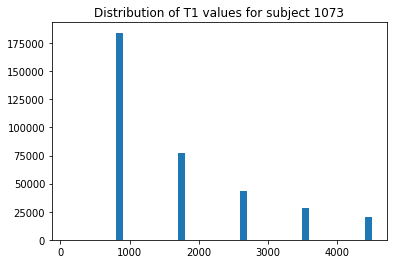

In [5]:
##don't run for now
## Create histogram of qT1 values
from nibabel import load
from matplotlib import pyplot as plt
files= glob(data_locations['qt1'])
for file in files:
    qT1_image = load(file)
    qT1_data = qT1_image.get_data()

    plt.Figure()
    data = qT1_data.flatten()
    plt.hist(data, bins = range(100,4600,100))
    plt.title("Distribution of T1 values for subject "+ subject_id)
    plt.savefig(mri_location + subject_id + '/qc/' +basename(file)+ '_T1_histogram.png')
    plt.show()